## Dimensionality Reduction with PCA and TSNE

## Objective: 

The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and extract insights from poverty indicators drawn from different counties in Mexico.

## Dataset: 


The variables and description of the data set are drawn form a public survey ENIGH. (https://www.inegi.org.mx/programas/enigh/nc/2020/)


- %Pobreza: Pobreza
- %VCS: porcentaje vulneravilidad social
- %Vingreso: porcentaje vulneravilidad por ingreso
- %NP NV: porcentaje No pobre No Vulnerable
- %REducativo: porcentaje rezago educativo
- %CSSalud:  porcentaje carencia servicios de salud
- %CSSocial: porcentaje carencia seguridad social
- %CVivienda: porcentaje carencia por calidad y espacios de la vivienda
- %CSBVivienda: porcentaje por carencia a los servicios básicos de la vivienda
- %CAlimento: carencia por acceso a la alimentación
- %P1CS: población con al menos una carencia social
- %P3CS: población con tres o más carencias sociales
- %PiLP: población con ingreso inferior a la linea de pobreza por ingreso
- %PiLPx: población con ingreso inferior a la linea de pobreza extrema por ingreso
- %EcoActiva: la población económicamente activa 
- %EcoNoActiva: económicamente no actica
- %NoEspecifica: población que no está especificada si es o no económicamente activo
- %PenJub: personas pensionadas o jubilidas
- %Estud:  estudiantes
- %Hogar: que se dedican a tareas del hogar
- %LimFis: personas que presentan alguna limitación física o mental que le impide trabajar
- %OtrasAct: otras actividades no económicas

All variables are represented as percetages from the total population of each county.

In [1]:
#Importing libraries and overview of the data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.precision = 3



In [2]:
#Loading the data
data = pd.read_csv('data')

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2469 non-null   int64  
 1   Clave de entidad    2469 non-null   int64  
 2   Entidad federativa  2469 non-null   object 
 3   Clave de municipio  2469 non-null   int64  
 4   Municipio           2469 non-null   object 
 5   %Pobreza            2469 non-null   object 
 6   %Pextrema           2469 non-null   object 
 7   %Pmoderada          2469 non-null   object 
 8   %VCS                2469 non-null   object 
 9   %VIngreso           2469 non-null   object 
 10  %NP NV              2469 non-null   object 
 11  %REducativo         2469 non-null   object 
 12  %CSSalud            2469 non-null   object 
 13  %CSSocial           2469 non-null   object 
 14  %Cvivienda          2469 non-null   object 
 15  %CSBVivienda        2469 non-null   object 
 16  %Calim

In [4]:
#Drop unnecessary columns
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.drop(["Clave de entidad", 'Entidad federativa', 'Clave de municipio', 'Municipio'], axis=1, inplace=True)
data.columns

Index(['%Pobreza', '%Pextrema', '%Pmoderada', '%VCS', '%VIngreso', '%NP NV',
       '%REducativo', '%CSSalud', '%CSSocial', '%Cvivienda', '%CSBVivienda',
       '%Calimento', '%P1CS', '%P3CS', '%PiLP', '%PiLPx', '%EcoActiva',
       '%EcoNoActiva', '%NoEspecifica', '%Ocupada', '%Desocupada', '%PenJub',
       '%Estud', '%Hogar', '%LimFis', '%OtrasAct'],
      dtype='object')

In [5]:
#Round data to two decimals
data = data.round(2)

In [6]:
#Transform all columns to float

cols = data.columns

data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   %Pobreza       2466 non-null   float64
 1   %Pextrema      2466 non-null   float64
 2   %Pmoderada     2466 non-null   float64
 3   %VCS           2466 non-null   float64
 4   %VIngreso      2466 non-null   float64
 5   %NP NV         2466 non-null   float64
 6   %REducativo    2466 non-null   float64
 7   %CSSalud       2466 non-null   float64
 8   %CSSocial      2466 non-null   float64
 9   %Cvivienda     2466 non-null   float64
 10  %CSBVivienda   2466 non-null   float64
 11  %Calimento     2466 non-null   float64
 12  %P1CS          2466 non-null   float64
 13  %P3CS          2466 non-null   float64
 14  %PiLP          2466 non-null   float64
 15  %PiLPx         2466 non-null   float64
 16  %EcoActiva     2469 non-null   float64
 17  %EcoNoActiva   2469 non-null   float64
 18  %NoEspec

In [7]:
#Drop rows with missing values 
data = data.dropna(axis=0)

In [8]:
#Check the missing values in each column
data.isnull().sum()

%Pobreza         0
%Pextrema        0
%Pmoderada       0
%VCS             0
%VIngreso        0
%NP NV           0
%REducativo      0
%CSSalud         0
%CSSocial        0
%Cvivienda       0
%CSBVivienda     0
%Calimento       0
%P1CS            0
%P3CS            0
%PiLP            0
%PiLPx           0
%EcoActiva       0
%EcoNoActiva     0
%NoEspecifica    0
%Ocupada         0
%Desocupada      0
%PenJub          0
%Estud           0
%Hogar           0
%LimFis          0
%OtrasAct        0
dtype: int64

## Exploratory Data Analysis

In [9]:
#Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
%Pobreza,"2,466.00",62.00,21.90,5.45,45.58,62.75,80.32,99.65
%Pextrema,"2,466.00",17.24,15.32,0.00,5.35,12.54,24.28,84.45
%Pmoderada,"2,466.00",44.77,12.28,5.17,37.27,46.00,53.03,85.04
%VCS,"2,466.00",25.06,13.89,0.00,14.77,24.32,33.95,77.58
%VIngreso,"2,466.00",3.94,3.73,0.00,1.09,2.69,5.67,23.61
%NP NV,"2,466.00",8.99,9.75,0.00,1.72,5.42,12.98,57.43
%REducativo,"2,466.00",25.66,9.97,2.87,18.20,25.20,32.43,61.39
%CSSalud,"2,466.00",25.11,12.46,1.05,16.05,23.23,32.83,83.86
%CSSocial,"2,466.00",72.41,14.81,22.03,64.36,76.50,83.48,96.99
%Cvivienda,"2,466.00",16.34,12.31,0.78,7.09,12.80,21.78,76.68


%Pobreza
Skew : -0.22


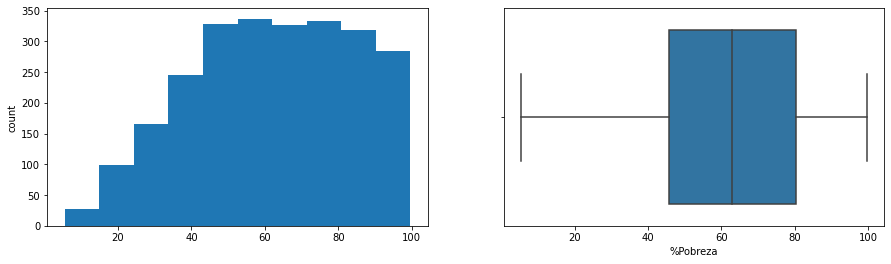

%Pextrema
Skew : 1.34


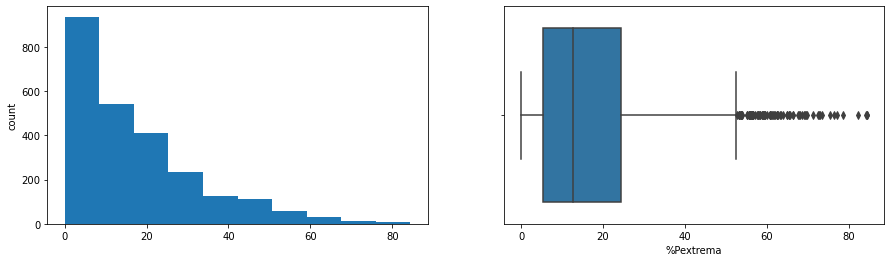

%Pmoderada
Skew : -0.37


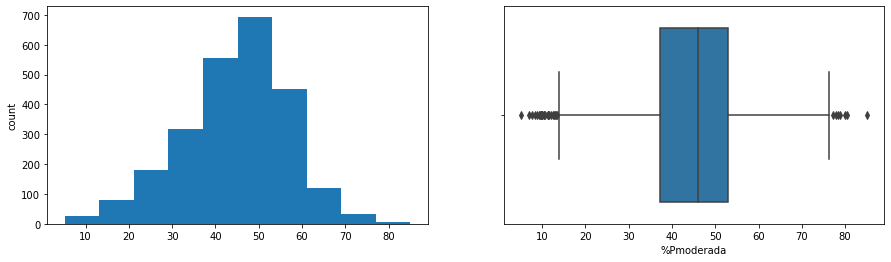

%VCS
Skew : 0.49


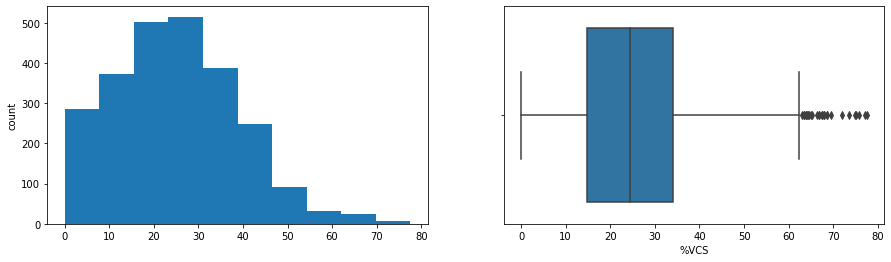

%VIngreso
Skew : 1.38


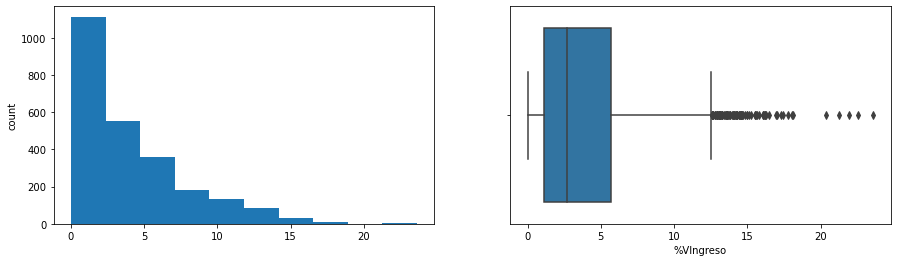

%NP NV
Skew : 1.57


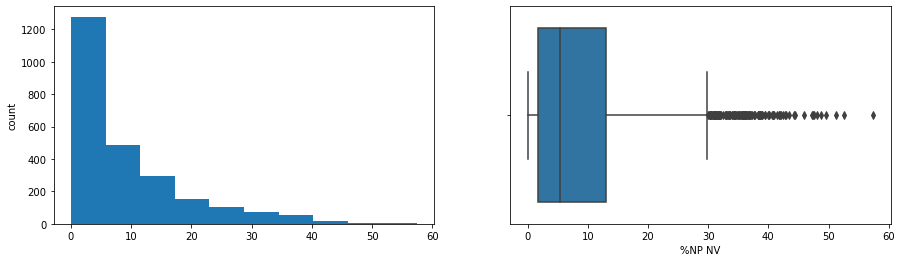

%REducativo
Skew : 0.37


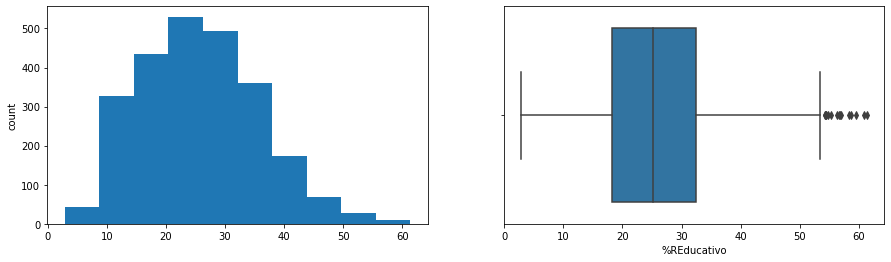

%CSSalud
Skew : 0.66


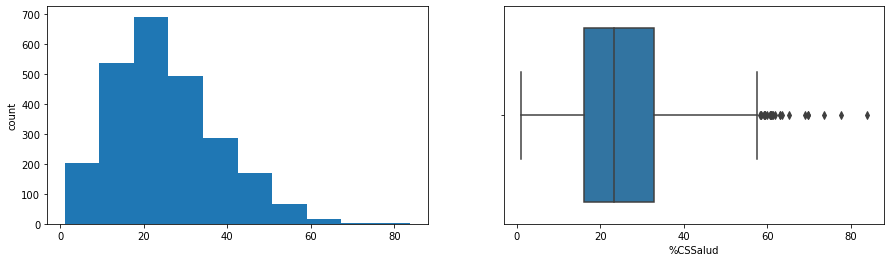

%CSSocial
Skew : -0.9


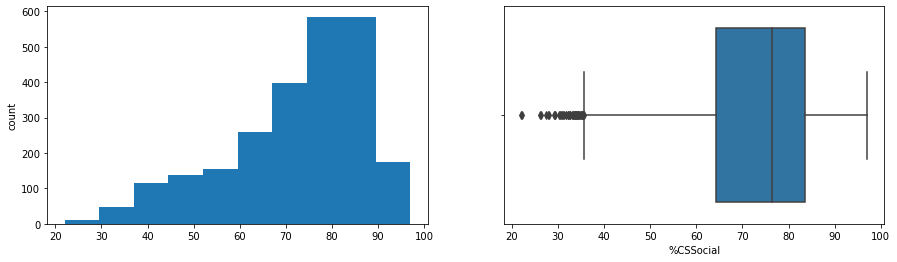

%Cvivienda
Skew : 1.46


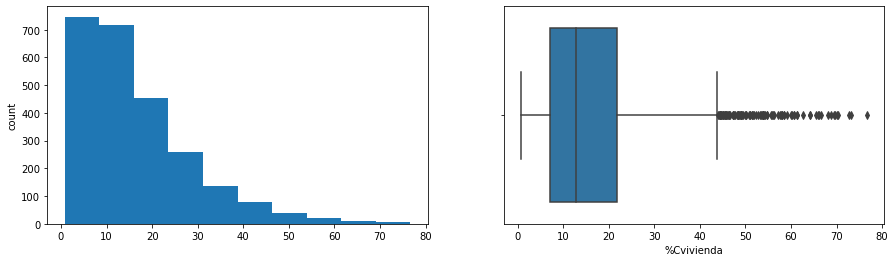

%CSBVivienda
Skew : 0.33


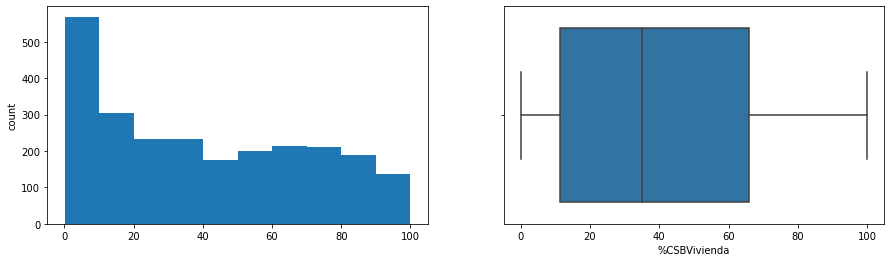

%Calimento
Skew : 0.9


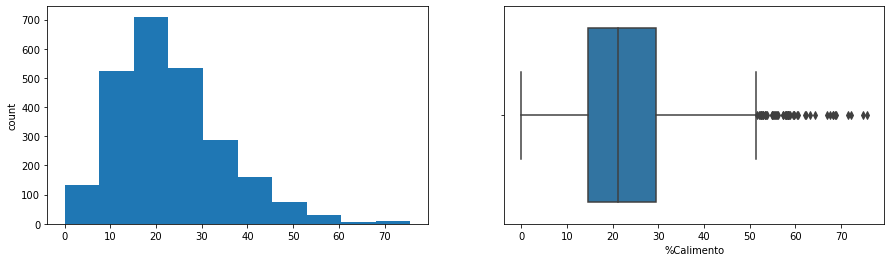

%P1CS
Skew : -1.29


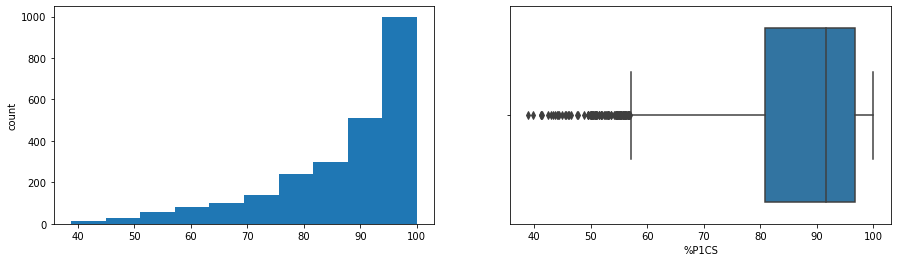

%P3CS
Skew : 0.44


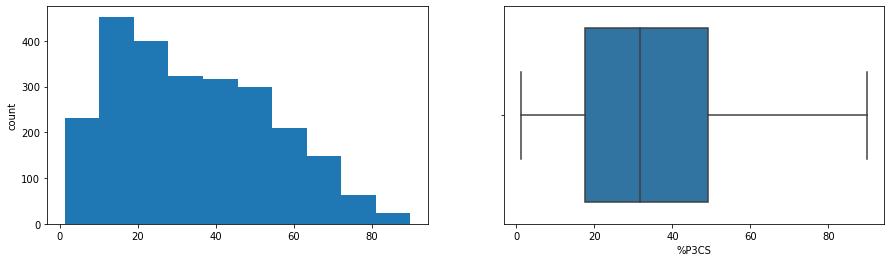

%PiLP
Skew : -0.33


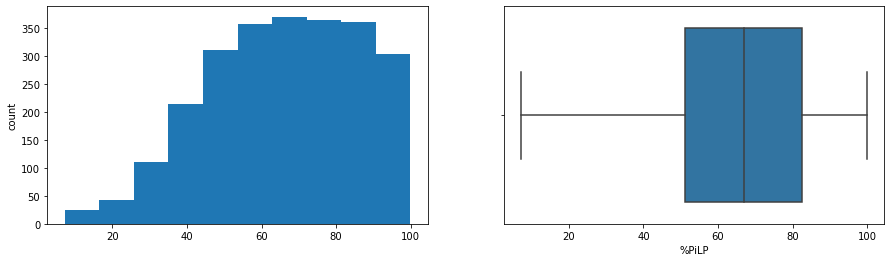

%PiLPx
Skew : 0.77


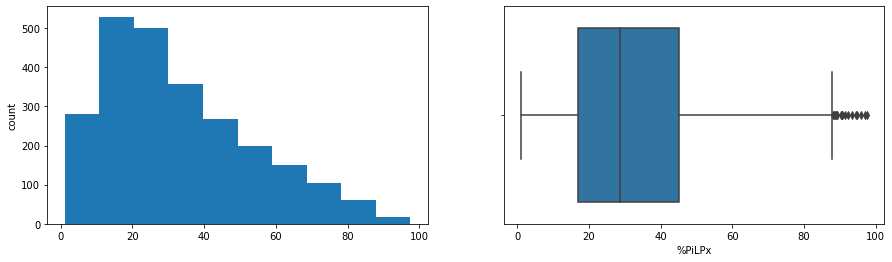

%EcoActiva
Skew : -1.58


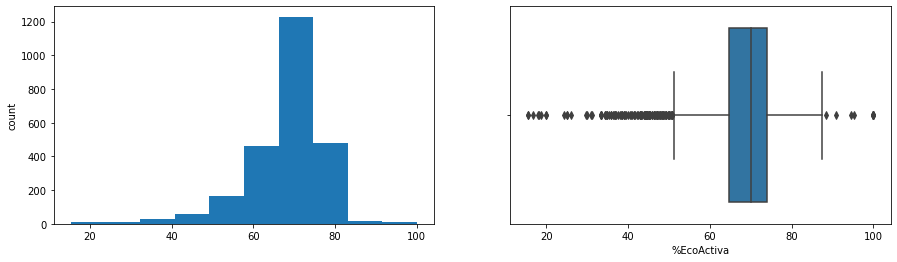

%EcoNoActiva
Skew : 1.6


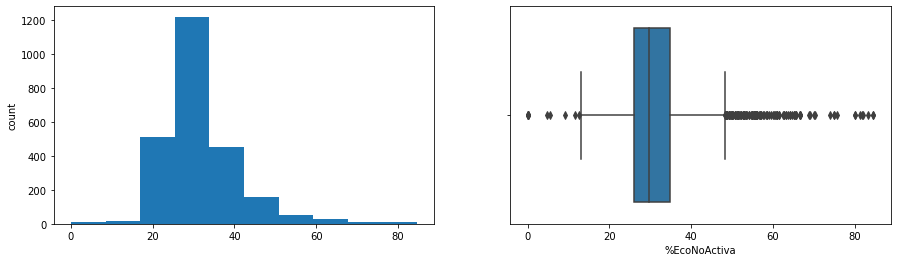

%NoEspecifica
Skew : 16.69


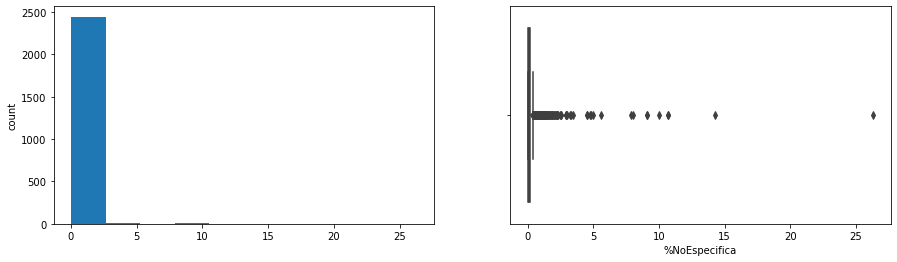

%Ocupada
Skew : -1.57


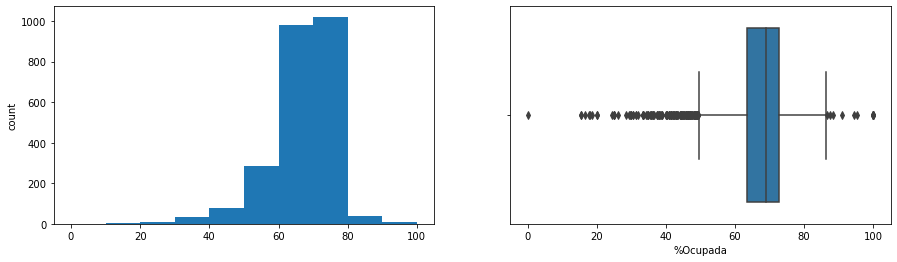

%Desocupada
Skew : 8.03


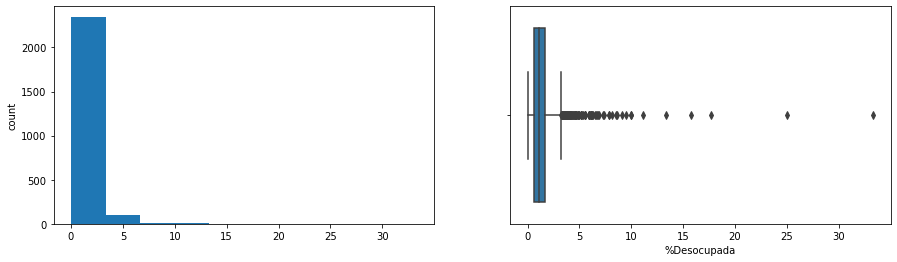

%PenJub
Skew : 2.68


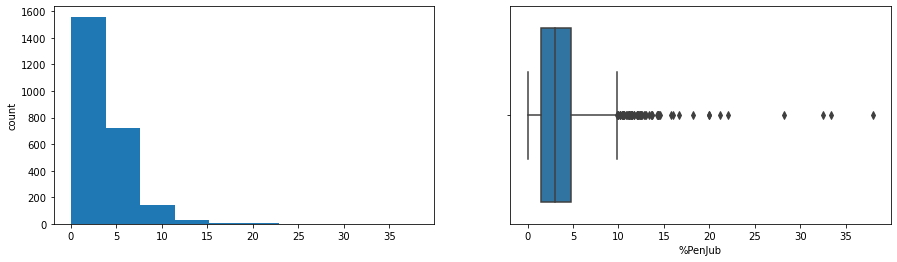

%Estud
Skew : 2.4


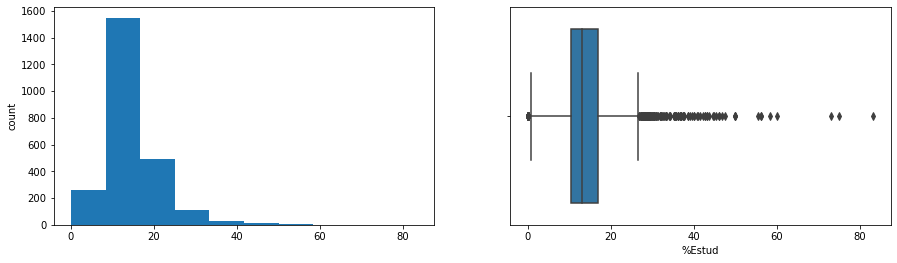

%Hogar
Skew : 2.25


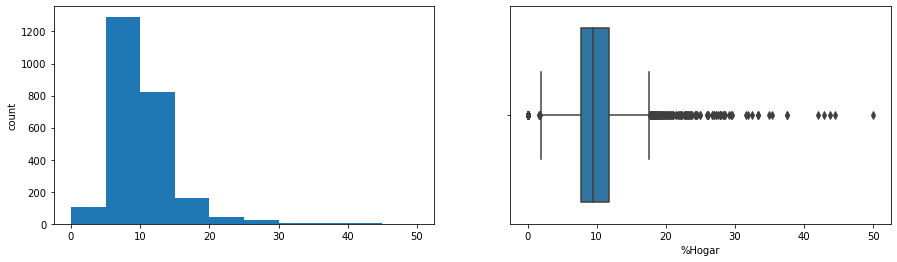

%LimFis
Skew : 18.97


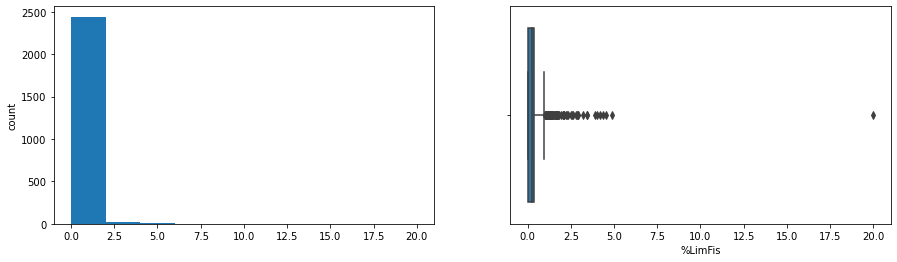

%OtrasAct
Skew : 4.45


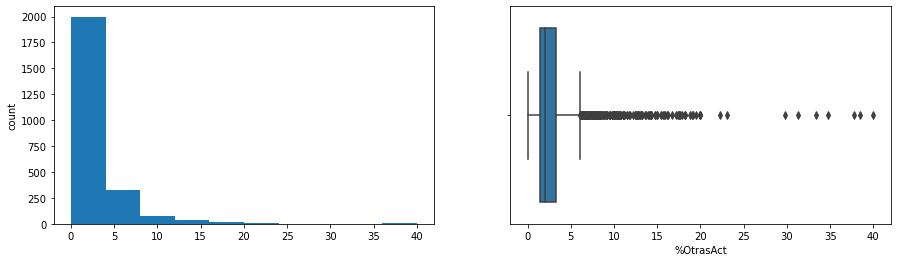

In [10]:
#Lets check the distributions and outliers of each variable in the data
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

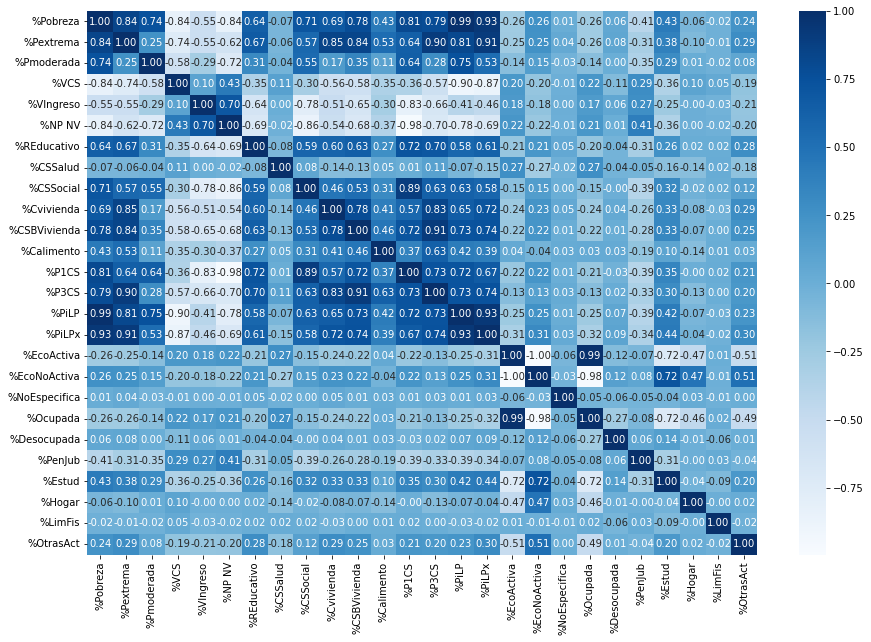

In [11]:
#Now let's check the correlation among different variables
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f', cmap='Blues')
plt.show()

In [12]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Generate a new data frame with the scaled data
data_scaled = pd.DataFrame(data_scaled, columns =data.columns)

## Principal Component Analysis

In [13]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

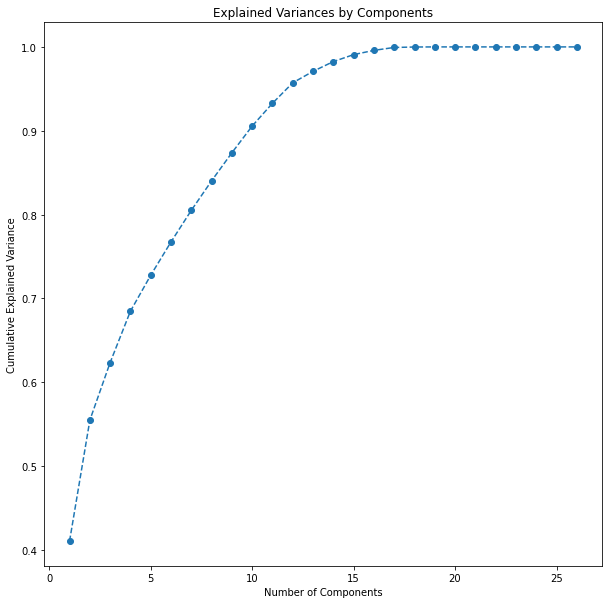

In [14]:
# visualize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,27), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

#Note: the plot has to have in range the number of variables + 1

In [15]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


In [17]:
#Making a new dataframe with first 8 principal components and original features as indices
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
data_pca = pd.DataFrame(np.round(pca.components_[:5,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

#Note: the number in de index [:#] has to be the number of components

,PC1,PC2,PC3,PC4,PC5
%Pobreza,0.290,-0.060,0.090,-0.180,0.050
%Pextrema,0.270,-0.050,0.220,0.200,0.000
%Pmoderada,0.180,-0.040,-0.120,-0.560,0.090
%VCS,-0.220,0.020,-0.430,0.250,-0.120
%VIngreso,-0.210,0.070,0.380,-0.240,0.100
%NP NV,-0.270,0.080,0.270,0.120,0.020
%REducativo,0.230,-0.040,-0.160,0.190,0.090
%CSSalud,-0.030,-0.190,-0.140,-0.020,-0.370
%CSSocial,0.230,-0.100,-0.350,-0.060,-0.120
%Cvivienda,0.240,-0.030,0.180,0.290,0.040


Text(0, 0.5, 'PC2')

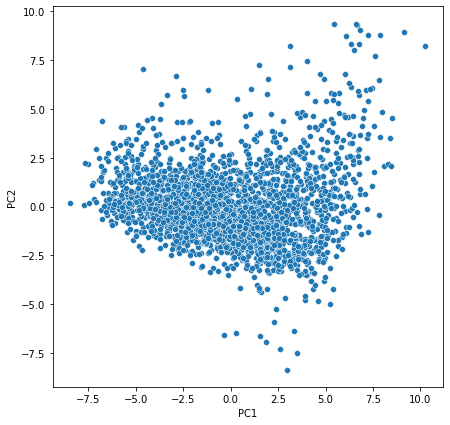

In [18]:
#We can also visualize the data in two dimensions of the two principal components

plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

## t-SNE

In [19]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)

In [20]:
#Converting the embeddings to a dataframe
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2'])

<AxesSubplot:xlabel='X1', ylabel='X2'>

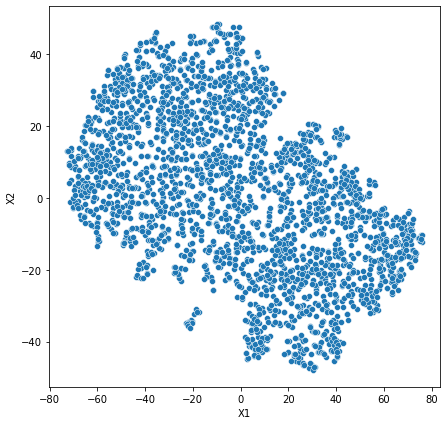

In [21]:
#Scatter plot for two components
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_tsne)

**Observations:**

- We know that tsne preserves the local structure of the data while embedding the data from high dimension to low dimension.
- Here, we have generated the 2D and 3D embeddings for the data. We can see that there is pattern in the data and it is scattered and clustered together with exception of some outliers.
- Let's try different perplexity values to visualize the data in 2d.

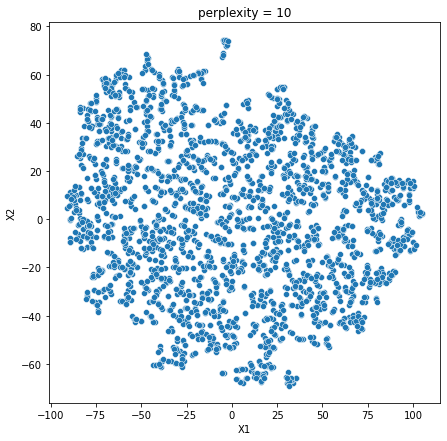

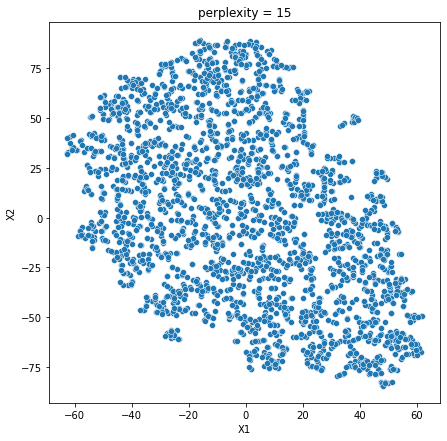

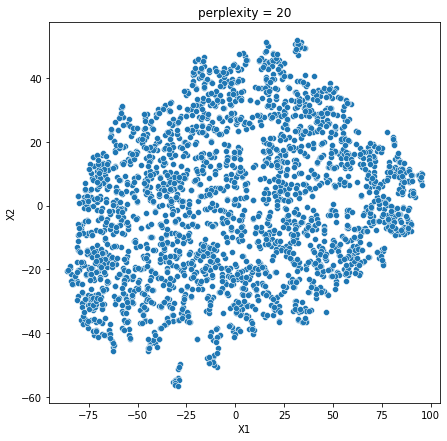

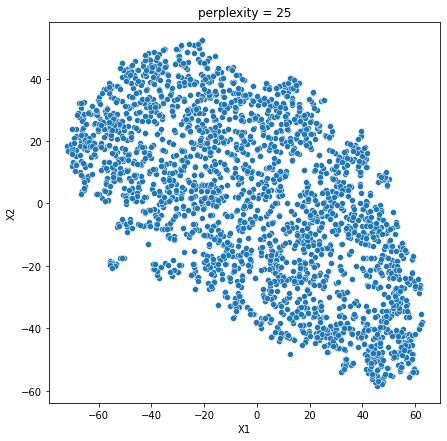

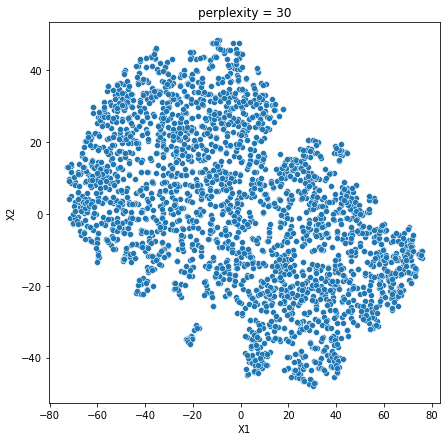

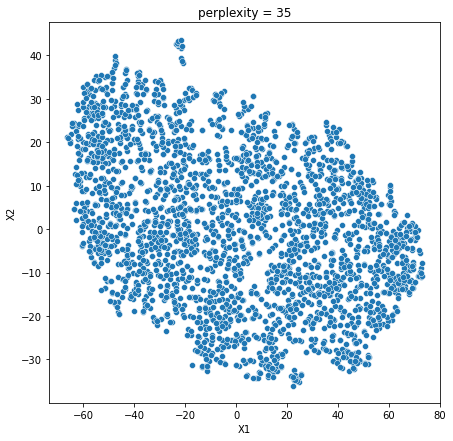

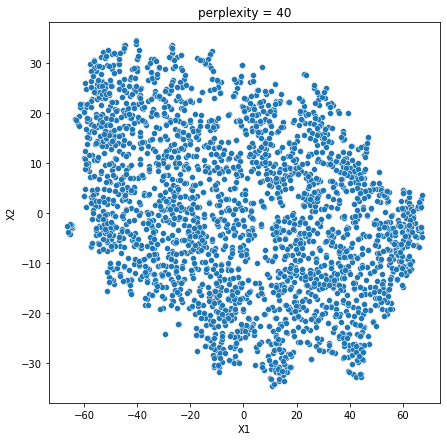

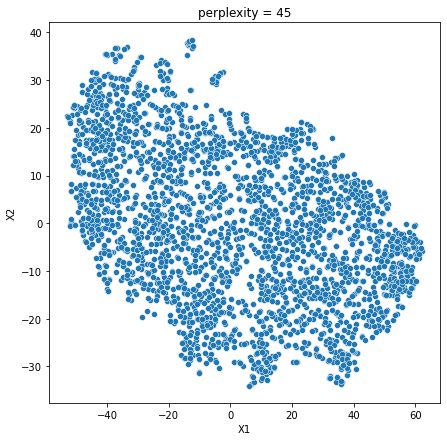

In [23]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i)
    data_tsne = tsne.fit_transform(data_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y='X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

**Observations:**

- All the plots with different perplexity values implies that there is no underlying pattern in the data.